In [ ]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'missingno'

In [8]:
sys.path.append("C:/Users/44756/Documents/Postgrad/DSA8030/Data/")

In [39]:
init_data = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/realtor-data.csv", dtype = {'zip_code':'string'})
init_data

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,00601,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,00601,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,00795,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,00731,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,00680,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-03-24


In [43]:
init_data.dtypes

brokered_by              float64
status                    object
price                    float64
bed                      float64
bath                     float64
acre_lot                 float64
street                   float64
city                      object
state                     object
zip_code          string[python]
house_size               float64
prev_sold_date            object
dtype: object

In [118]:
init_data.value_counts(subset = 'status')

status
for_sale          1389306
sold               812009
ready_to_build      25067
Name: count, dtype: int64

In [119]:
init_data[init_data.status == 'sold'].isnull().sum()

brokered_by         3020
status                 0
price                245
bed                69974
bath               77929
acre_lot          107622
street              2277
city                  98
state                  0
zip_code              12
house_size        103710
prev_sold_date         0
dtype: int64

In [ ]:
# Filter for sold houses with prev_sold_date of the form 1###-##-## or 2###-##-## to remove erroneous dates
sold_valdate = init_data[init_data.status == 'sold'][init_data[init_data.status == 'sold'].prev_sold_date.str.match('^[12][0-9]{3}-[0-9]{2}-[0-9]{2}')]

In [ ]:
# Convert date column to datetime type
sold_valdate.prev_sold_date = pd.to_datetime(sold_valdate['prev_sold_date'], format = "%Y-%M-%d")

In [117]:
sold_valdate.describe()

,brokered_by,price,bed,bath,acre_lot,street,house_size,prev_sold_date
count,808988.000000,8.117630e+05,742034.000000,734079.000000,704387.000000,8.097310e+05,708298.000000,812008
mean,52956.632025,4.841722e+05,3.193835,2.394419,12.344141,9.469550e+05,1914.039277,2021-09-26 18:31:23.681589248
min,0.000000,1.000000e+00,1.000000,1.000000,0.000000,5.000000e+00,100.000000,2021-01-01 00:11:00
25%,23573.000000,2.020000e+05,3.000000,2.000000,0.140000,4.747795e+05,1261.000000,2021-01-28 00:12:00
50%,52950.000000,3.449000e+05,3.000000,2.000000,0.210000,9.459750e+05,1680.000000,2022-01-10 00:03:00
75%,79180.000000,5.500000e+05,4.000000,3.000000,0.450000,1.416084e+06,2269.000000,2022-01-21 00:03:00
max,110138.000000,2.950000e+08,444.000000,222.000000,100000.000000,2.001348e+06,933491.000000,2022-01-31 00:03:00
std,30660.765676,7.880800e+05,1.305021,1.156687,773.386695,5.441483e+05,2590.634570,NaN


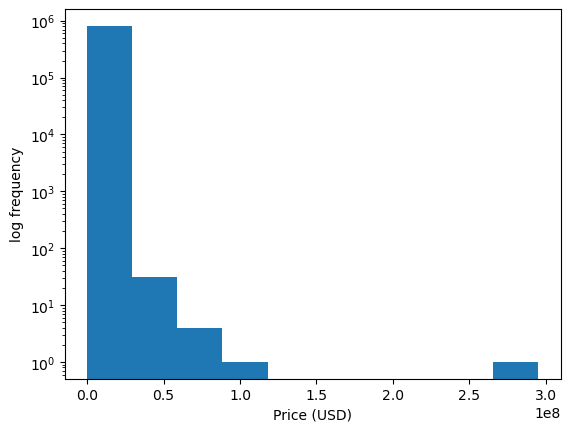

In [126]:
# Histogram of prices

fig, ax = plt.subplots()

ax.hist(sold_valdate.price)
ax.set_yscale('log')
ax.set_xlabel('Price (USD)')
ax.set_ylabel('log frequency')
plt.show()

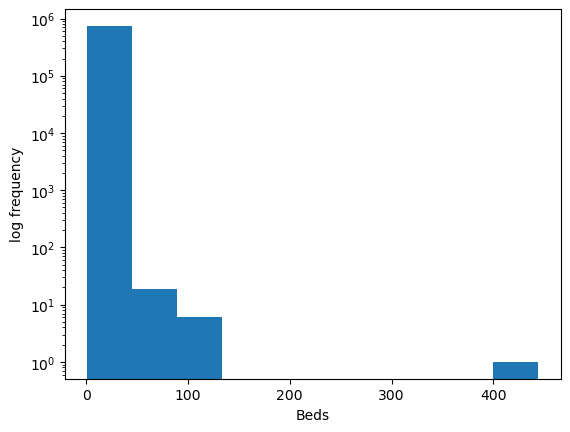

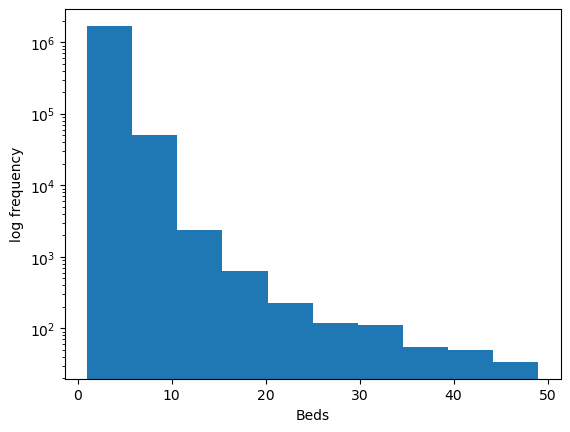

In [122]:
# Histograms of bed number

# Full data
fig, ax = plt.subplots()

ax.hist(sold_valdate.bed)
ax.set_yscale('log')
ax.set_xlabel('Beds')
ax.set_ylabel('log frequency')
plt.show()

# <50 beds
fig, ax = plt.subplots()

ax.hist(init_data.bed[init_data.bed < 50])
ax.set_yscale('log')
ax.set_xlabel('Beds')
ax.set_ylabel('log frequency')
plt.show()

In [123]:
sold_valdate[sold_valdate.bed > 100]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1876419,60817.0,sold,2499000.0,114.0,57.0,7.00,533184.0,Lawrenceville,Illinois,62439,NaN,2021-01-27 00:12:00
1896520,52841.0,sold,7000000.0,120.0,NaN,4.66,1622291.0,Fayetteville,Arkansas,72701,44475.0,2021-01-17 00:12:00
2188928,54823.0,sold,430000.0,444.0,222.0,0.34,118525.0,Sublimity,Oregon,97385,1700.0,2022-01-29 00:04:00


In [ ]:
# Histogram of prices

fig, ax = plt.subplots()

ax.hist(init_data.price, bins = 5)
ax.set_yscale('log')
ax.set_xlabel('Price (USD)')
ax.set_ylabel('log frequency')
plt.show()